In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data parts 0-10 and append
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'
}

train_X = pd.read_csv("part_0.csv", dtype=dtypes)
for i in range(1,11):
    df = pd.read_csv("part_"+str(i)+".csv", dtype=dtypes)
    train_X = pd.concat([train_X, df])


print("Train data parts 0-10 shape is {}".format(train_X.shape))
print(train_X.head)
print(train_X.columns)
unique_sessions = len(train_X['session_id'].unique())
print(unique_sessions)

Train data parts 0-10 shape is (1100000, 20)
<bound method NDFrame.head of               session_id  index  elapsed_time      event_name       name   
0      20090312431273200      0             0  cutscene_click      basic  \
1      20090312431273200      1          1323    person_click      basic   
2      20090312431273200      2           831    person_click      basic   
3      20090312431273200      3          1147    person_click      basic   
4      20090312431273200      4          1863    person_click      basic   
...                  ...    ...           ...             ...        ...   
99995  20100418120710804    388        563058  notebook_click       next   
99996  20100418120710804    389        573991  notebook_click       next   
99997  20100418120710804    390        575056  notebook_click       next   
99998  20100418120710804    391        577187  notebook_click      close   
99999  20100418120710804    392        577434  navigate_click  undefined   

       level

In [6]:
labels = pd.read_csv('train_labels.csv')

labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

# Display the first 5 examples
print(labels.head(20))
print(labels.shape)
print(labels.columns)

              session_id  correct            session  q
0   20090312431273200_q1        1  20090312431273200  1
1   20090312433251036_q1        0  20090312433251036  1
2   20090312455206810_q1        1  20090312455206810  1
3   20090313091715820_q1        0  20090313091715820  1
4   20090313571836404_q1        1  20090313571836404  1
5   20090314035813970_q1        1  20090314035813970  1
6   20090314121766812_q1        1  20090314121766812  1
7   20090314221187252_q1        0  20090314221187252  1
8   20090314363702160_q1        1  20090314363702160  1
9   20090314441803444_q1        1  20090314441803444  1
10  20090315081004164_q1        0  20090315081004164  1
11  20090315085850788_q1        1  20090315085850788  1
12  20090315101457836_q1        1  20090315101457836  1
13  20090315170769824_q1        1  20090315170769824  1
14  20090315270479452_q1        0  20090315270479452  1
15  20090316152177500_q1        1  20090316152177500  1
16  20090316190523732_q1        1  2009031619052

<Axes: xlabel='correct'>

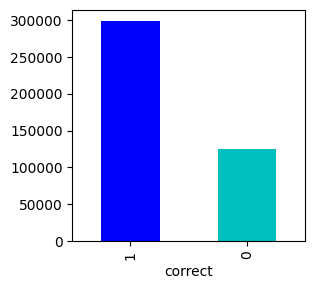

In [11]:
plt.figure(figsize=(3, 3))
plot_df = labels.correct.value_counts()
plot_df.plot(kind="bar", color=['b', 'c'])

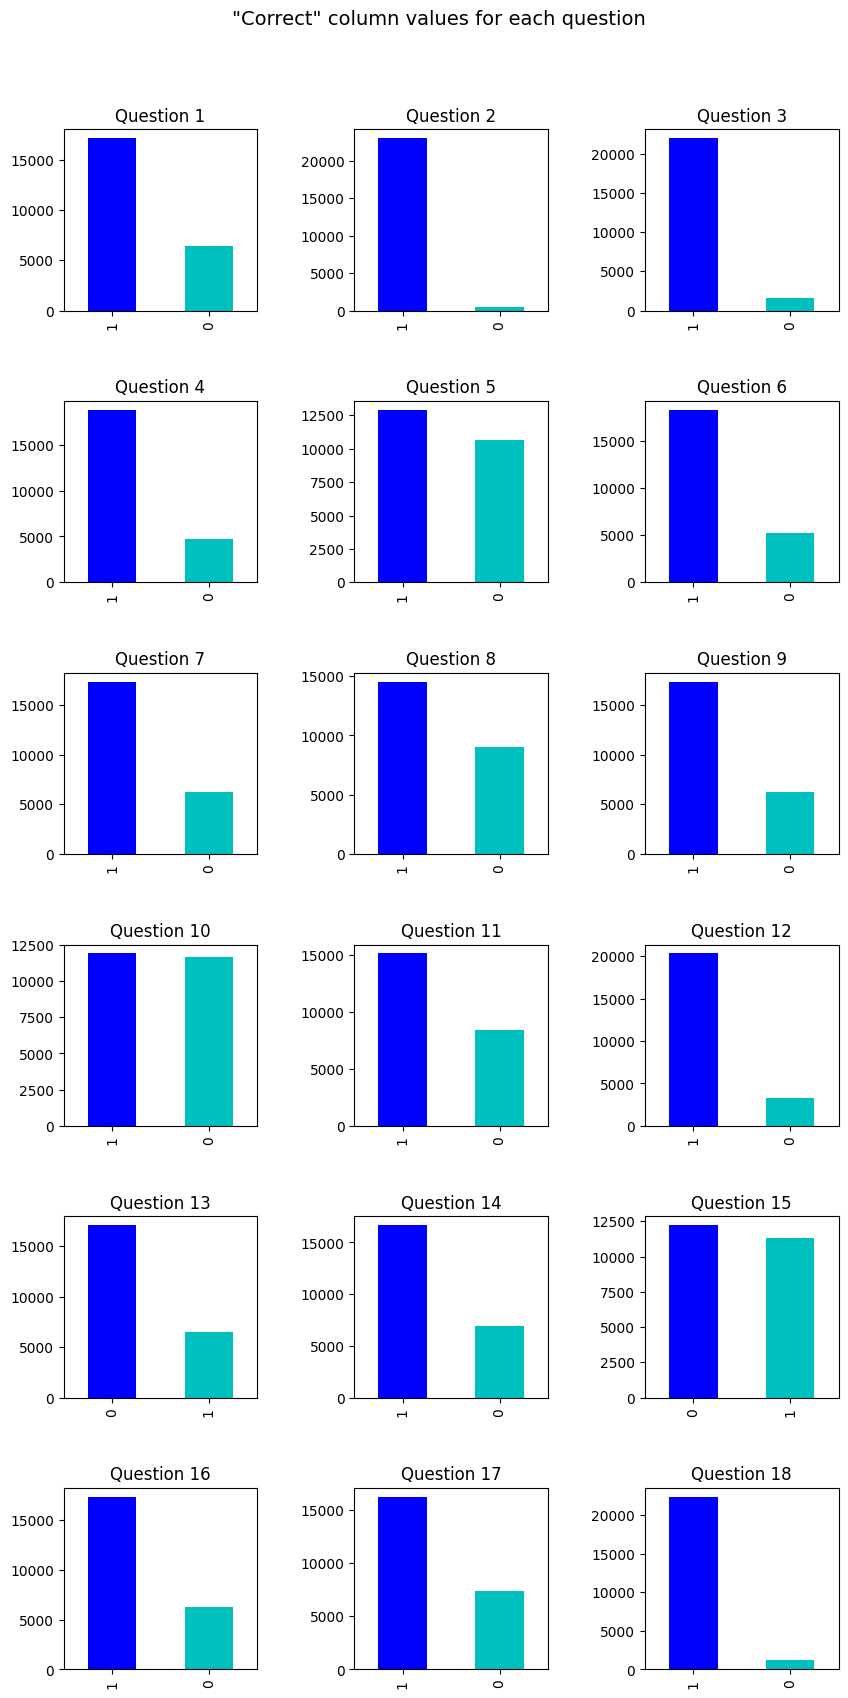

In [12]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("\"Correct\" column values for each question", fontsize=14, y=0.94)
for n in range(1,19):
    #print(n, str(n))
    ax = plt.subplot(6, 3, n)

    # filter df and plot ticker on the new subplot axis
    plot_df = labels.loc[labels.q == n]
    plot_df = plot_df.correct.value_counts()
    plot_df.plot(ax=ax, kind="bar", color=['b', 'c'])
    
    # chart formatting
    ax.set_title("Question " + str(n))
    ax.set_xlabel("")


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data parts 0-10 and append
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'
}


train_X = pd.read_csv("Parts/part_0.csv", dtype=dtypes)
for i in range(1,263):
    df = pd.read_csv("Parts/part_"+str(i)+".csv", dtype=dtypes)
    train_X = pd.concat([train_X, df])


print("Train data shape is {}".format(train_X.shape))


Train data shape is (26296946, 20)


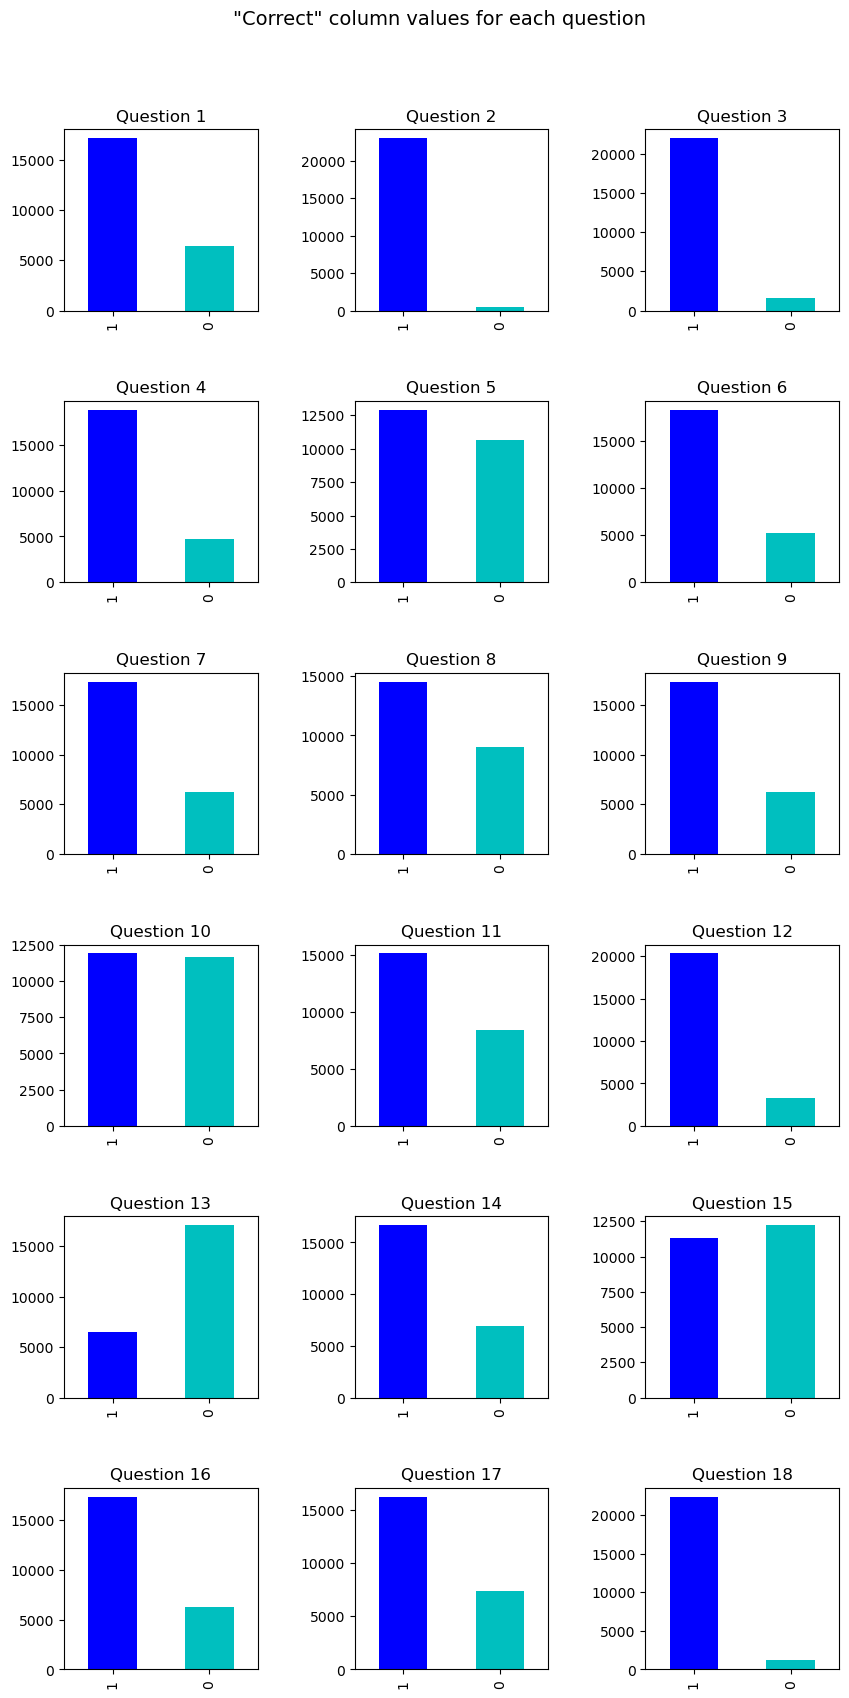

In [7]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("\"Correct\" column values for each question", fontsize=14, y=0.94)
for n in range(1,19):
    ax = plt.subplot(6, 3, n)

    # filter df and plot ticker on the new subplot axis
    plot_df = labels.loc[labels.q == n]
    plot_df = plot_df.correct.value_counts()

    # sort the index in descending order to ensure 1 is always on the left and 0 is on the right
    plot_df = plot_df.sort_index(ascending=False)

    plot_df.plot(ax=ax, kind="bar", color=['b', 'c'])
    
    # chart formatting
    ax.set_title("Question " + str(n))
    ax.set_xlabel("")


In [ ]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

def feature_engineer(dataset_df):
    dfs = []
    for c in CATEGORICAL:
        tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('mean')
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    dataset_df = pd.concat(dfs,axis=1)
    dataset_df = dataset_df.fillna(-1)
    dataset_df = dataset_df.reset_index()
    dataset_df = dataset_df.set_index('session_id')
    return dataset_df

In [14]:
dataset_df = feature_engineer(train_X)
print("Full prepared dataset shape is {}".format(dataset_df.shape))

Full prepared dataset shape is (2928, 22)


In [15]:
# Display the first 5 examples
dataset_df.head(5)

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.0,7.701275,...,383.044861,2389.500000,49246.539458,1.230975,-1.000000,399.296038,129.292411,214.871000,104.082743,3227.370757
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.0,-130.347168,...,379.301025,899.925903,126666.129584,2.358652,-1.000000,622.061374,230.370874,240.280218,99.067861,1305.088265
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.0,14.306062,...,378.784912,969.333313,80175.676658,2.096919,-1.000000,357.227701,137.409476,203.268560,120.255453,1316.408315
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.0,-84.045959,...,370.723083,1378.750000,67372.714092,1.232616,0.000000,445.980041,156.186242,252.554707,121.062929,2114.876406
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.1,-30.762283,...,387.930084,720.384949,777382.529186,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518


In [16]:
dataset_df.describe()

,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,room_coor_y,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03
mean,10.501025,3.891393,40.746243,10.303962,23.985997,2.111767e+06,9.312282,1.426502,-31.645903,-89.821739,...,375.826385,2277.439453,5.792319e+05,1.914427,0.029008,466.221746,183.240657,237.587123,123.845763,5.038608e+03
std,0.730982,0.821945,13.180340,2.971420,9.009247,1.180197e+07,6.531408,2.359135,79.640091,68.972237,...,32.988098,8950.254883,5.185581e+06,0.495575,0.788594,105.876164,48.132897,26.247842,14.933121,4.459870e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000,-1.000000,-274.294220,-375.855438,...,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00
25%,10.000000,3.000000,26.000000,7.000000,15.000000,1.703500e+05,2.048580,-1.000000,-90.846764,-149.963520,...,357.011238,1007.969757,8.691995e+04,1.291425,-1.000000,379.156123,144.384476,220.800933,114.398368,1.431302e+03
50%,11.000000,4.000000,43.000000,11.000000,23.000000,6.047946e+05,8.167324,0.666667,-18.365590,-70.123772,...,376.200043,1437.437134,1.473895e+05,2.095639,0.000000,430.852956,164.144390,236.773891,122.824000,2.052720e+03
75%,11.000000,4.000000,52.000000,12.000000,32.000000,1.405770e+06,17.605597,3.793478,24.316590,-37.865294,...,393.655518,2188.131042,2.419623e+05,2.313874,0.702349,583.781889,232.891910,251.869250,132.202800,3.151055e+03
max,11.000000,6.000000,81.000000,17.000000,46.000000,3.467625e+08,19.539847,6.000000,270.105316,78.320251,...,716.112000,373777.625000,2.060821e+08,2.951435,2.468483,726.525717,325.943451,480.806059,239.024554,1.935440e+06


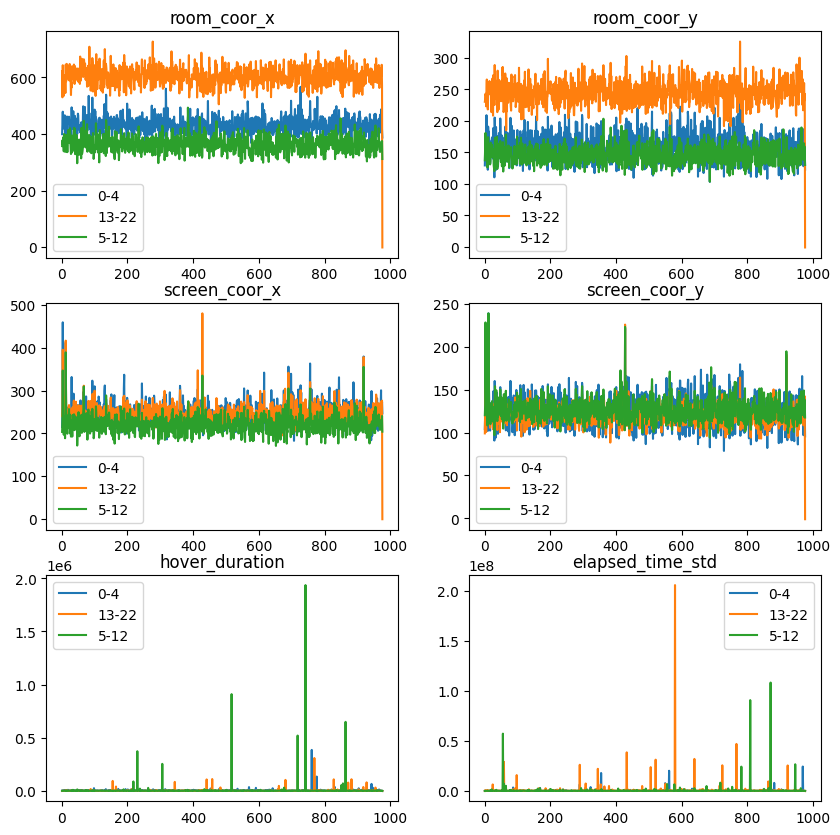

In [17]:
figure, axis = plt.subplots(3, 2, figsize=(10, 10))

for name, data in dataset_df.groupby('level_group'):
    axis[0, 0].plot(range(1, len(data['room_coor_x_std'])+1), data['room_coor_x_std'], label=name)
    axis[0, 1].plot(range(1, len(data['room_coor_y_std'])+1), data['room_coor_y_std'], label=name)
    axis[1, 0].plot(range(1, len(data['screen_coor_x_std'])+1), data['screen_coor_x_std'], label=name)
    axis[1, 1].plot(range(1, len(data['screen_coor_y_std'])+1), data['screen_coor_y_std'], label=name)
    axis[2, 0].plot(range(1, len(data['hover_duration'])+1), data['hover_duration_std'], label=name)
    axis[2, 1].plot(range(1, len(data['elapsed_time_std'])+1), data['elapsed_time_std'], label=name)
    

axis[0, 0].set_title('room_coor_x')
axis[0, 1].set_title('room_coor_y')
axis[1, 0].set_title('screen_coor_x')
axis[1, 1].set_title('screen_coor_y')
axis[2, 0].set_title('hover_duration')
axis[2, 1].set_title('elapsed_time_std')

for i in range(3):
    axis[i, 0].legend()
    axis[i, 1].legend()

plt.show()

In [18]:
print(labels.columns)
print(dataset_df.columns)
dataset_df.head()

Index(['session_id', 'correct', 'session', 'q'], dtype='object')
Index(['level_group', 'event_name_nunique', 'name_nunique', 'fqid_nunique',
       'room_fqid_nunique', 'text_fqid_nunique', 'elapsed_time', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'elapsed_time_std', 'level_std', 'page_std',
       'room_coor_x_std', 'room_coor_y_std', 'screen_coor_x_std',
       'screen_coor_y_std', 'hover_duration_std'],
      dtype='object')


,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.0,7.701275,...,383.044861,2389.500000,49246.539458,1.230975,-1.000000,399.296038,129.292411,214.871000,104.082743,3227.370757
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.0,-130.347168,...,379.301025,899.925903,126666.129584,2.358652,-1.000000,622.061374,230.370874,240.280218,99.067861,1305.088265
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.0,14.306062,...,378.784912,969.333313,80175.676658,2.096919,-1.000000,357.227701,137.409476,203.268560,120.255453,1316.408315
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.0,-84.045959,...,370.723083,1378.750000,67372.714092,1.232616,0.000000,445.980041,156.186242,252.554707,121.062929,2114.876406
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.1,-30.762283,...,387.930084,720.384949,777382.529186,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518


In [31]:
from sklearn.model_selection import train_test_split

merged_df = dataset_df.merge(labels, left_on='session_id', right_on='session', how='inner')


# Split merged_df into features (X) and labels (y)
X = merged_df.drop('correct', axis=1)
y = merged_df['correct']

unique_sessions = len(merged_df['session_id'].unique())
print(unique_sessions)




17568


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb



# Create the XGBoost model
params = {

}
xgb_model = xgb.XGBRegressor(**params)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)


In [ ]:
### Add Code for Random Tree Classifier  

In [ ]:
### Add Code for LSTM